## Importing necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
#import xgboost as xgb
#from imblearn.over_sampling import SMOTE
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics
#from imblearn.pipeline import Pipeline as imbpipeline
from IPython.display import Image

## Import the dataset and basic preprocessing

In [ ]:
train_data = pd.read_csv("../Data/aps_failure_training_set.csv",skiprows=20)
train_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0


In [ ]:
test_data = pd.read_csv("../Data/aps_failure_test_set.csv",skiprows=20)
test_data

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,60,0,20,12,0,0,0,0,0,...,1098,138,412,654,78,88,0,0,0,0
1,neg,82,0,68,40,0,0,0,0,0,...,1068,276,1620,116,86,462,0,0,0,0
2,neg,66002,2,212,112,0,0,0,0,0,...,495076,380368,440134,269556,1315022,153680,516,0,0,0
3,neg,59816,na,1010,936,0,0,0,0,0,...,540820,243270,483302,485332,431376,210074,281662,3232,0,0
4,neg,1814,na,156,140,0,0,0,0,0,...,7646,4144,18466,49782,3176,482,76,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15995,neg,81852,na,2130706432,892,0,0,0,0,0,...,632658,273242,510354,373918,349840,317840,960024,25566,0,0
15996,neg,18,0,52,46,8,26,0,0,0,...,266,44,46,14,2,0,0,0,0,0
15997,neg,79636,na,1670,1518,0,0,0,0,0,...,806832,449962,778826,581558,375498,222866,358934,19548,0,0
15998,neg,110,na,36,32,0,0,0,0,0,...,588,210,180,544,1004,1338,74,0,0,0


In [ ]:
data = pd.concat([test_data, train_data])

In [ ]:
data = data.reset_index()
data.drop('index', axis=1, inplace=True)
X = data.iloc[:,1:]
Y = pd.DataFrame(data.iloc[:,0])
Train_X = train_data.iloc[:,1:]
Train_Y = pd.DataFrame(train_data.iloc[:,0])
Test_X = test_data.iloc[:,1:]
Test_Y = pd.DataFrame(test_data.iloc[:,0])

## Research on what types of techniques are usually used for dealing with data with missing values

### There are numerous ways to handle missing values, including deleting the row or column with missing values imputation(replacing with an arbitrary value)
### For imputation, there are multiple ways to fill in the values- mean, median, mode, replacing with previous value(forward fill) and replacing with next value (backward fill). Another slightly more complex way to fill in misisng values is to predict them using other features.
### For the current application, imputation using mean values will be used.


In [ ]:
X = X.replace({'na':None})
X = X.astype('float64')
Train_X = Train_X.replace({'na':None})
Test_X = Test_X.replace({'na':None})
Train_X = Train_X.astype('float64')
Test_X = Test_X.astype('float64')
columns = X.columns
for i in columns:
    m = Test_X[columns].mean()
    X[columns] = X[columns].fillna(m)
    Test_X[columns] = Test_X[columns].fillna(m)
    Train_X[columns] = Train_X[columns].fillna(m)

##Calculating the coefficient of variation CV = s/m , where s is sample standard deviation and m is sample mean.

In [ ]:
cv = lambda x: round(np.std(x, ddof=1)/np.mean(x),4)
cvs = pd.DataFrame(X.apply(cv),columns=['Coefficient of Variance'])
cvs

,Coefficient of Variance
aa_000,4.3286
ab_000,2.0757
ac_000,2.1671
ad_000,274.6032
ae_000,22.3366
...,...
ee_007,4.8843
ee_008,3.3339
ee_009,5.7529
ef_000,48.4472


##  Plotting a correlation matrix for features

In [ ]:
cm = X.corr()
cm

,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
aa_000,1.000000,0.020338,-0.011540,-0.000800,0.025702,0.035848,0.011683,0.076371,0.195151,0.307433,...,0.414121,0.419907,0.409654,0.419773,0.425674,0.356968,0.259666,0.133763,0.006441,0.010448
ab_000,0.020338,1.000000,-0.011397,0.000025,0.024241,0.042587,0.000642,0.006521,0.023424,0.035531,...,0.026804,0.038724,0.030497,0.035613,0.024410,0.013777,0.004258,0.001661,0.046523,0.075490
ac_000,-0.011540,-0.011397,1.000000,-0.001672,-0.004769,-0.010611,0.015550,-0.002366,-0.009455,-0.022852,...,-0.009676,-0.006324,-0.007861,-0.008031,-0.014579,-0.018499,0.010479,0.017311,-0.006190,0.015825
ad_000,-0.000800,0.000025,-0.001672,1.000000,-0.000162,-0.000198,-0.000038,-0.000086,-0.000205,-0.000412,...,-0.001351,-0.001358,-0.001326,-0.001100,-0.001064,-0.000729,-0.001072,-0.000629,-0.000075,-0.000080
ae_000,0.025702,0.024241,-0.004769,-0.000162,1.000000,0.829986,-0.000442,-0.000624,0.001904,0.020596,...,0.012618,0.019320,0.012733,0.026320,0.066412,0.036506,-0.008446,-0.006970,0.063588,0.030854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ee_007,0.356968,0.013777,-0.018499,-0.000729,0.036506,0.046304,0.007631,0.068004,0.181969,0.475571,...,0.442198,0.432911,0.419633,0.380132,0.543449,1.000000,0.227099,0.063065,-0.000614,0.001091
ee_008,0.259666,0.004258,0.010479,-0.001072,-0.008446,-0.010927,0.000067,0.005356,0.009116,0.020690,...,0.442533,0.470575,0.448391,0.394022,0.365687,0.227099,1.000000,0.690147,-0.005307,-0.001888
ee_009,0.133763,0.001661,0.017311,-0.000629,-0.006970,-0.008567,-0.001103,-0.003538,-0.009087,-0.018162,...,0.224587,0.235844,0.220785,0.183844,0.158591,0.063065,0.690147,1.000000,-0.003211,-0.001039
ef_000,0.006441,0.046523,-0.006190,-0.000075,0.063588,0.093475,-0.000078,0.001093,0.005498,0.010802,...,0.003363,0.009853,0.002683,0.026608,0.004975,-0.000614,-0.005307,-0.003211,1.000000,0.222579


## Pick ⌊ √ 170⌋ features with highest CV

In [ ]:
listCV = X.apply(cv)
sorted_index_array = np.argsort(listCV)
top13CV = listCV[sorted_index_array[-13:]]
top13CV

ay_009     77.4736
az_009     78.3963
ak_000     78.8605
au_000     85.3150
ag_000     91.8734
df_000     96.4897
as_000    111.7541
dh_000    115.3862
dj_000    130.4673
cs_009    190.5872
ad_000    274.6032
co_000    274.8931
cf_000    275.5724
dtype: float64

## Scatter plots and box plots for them

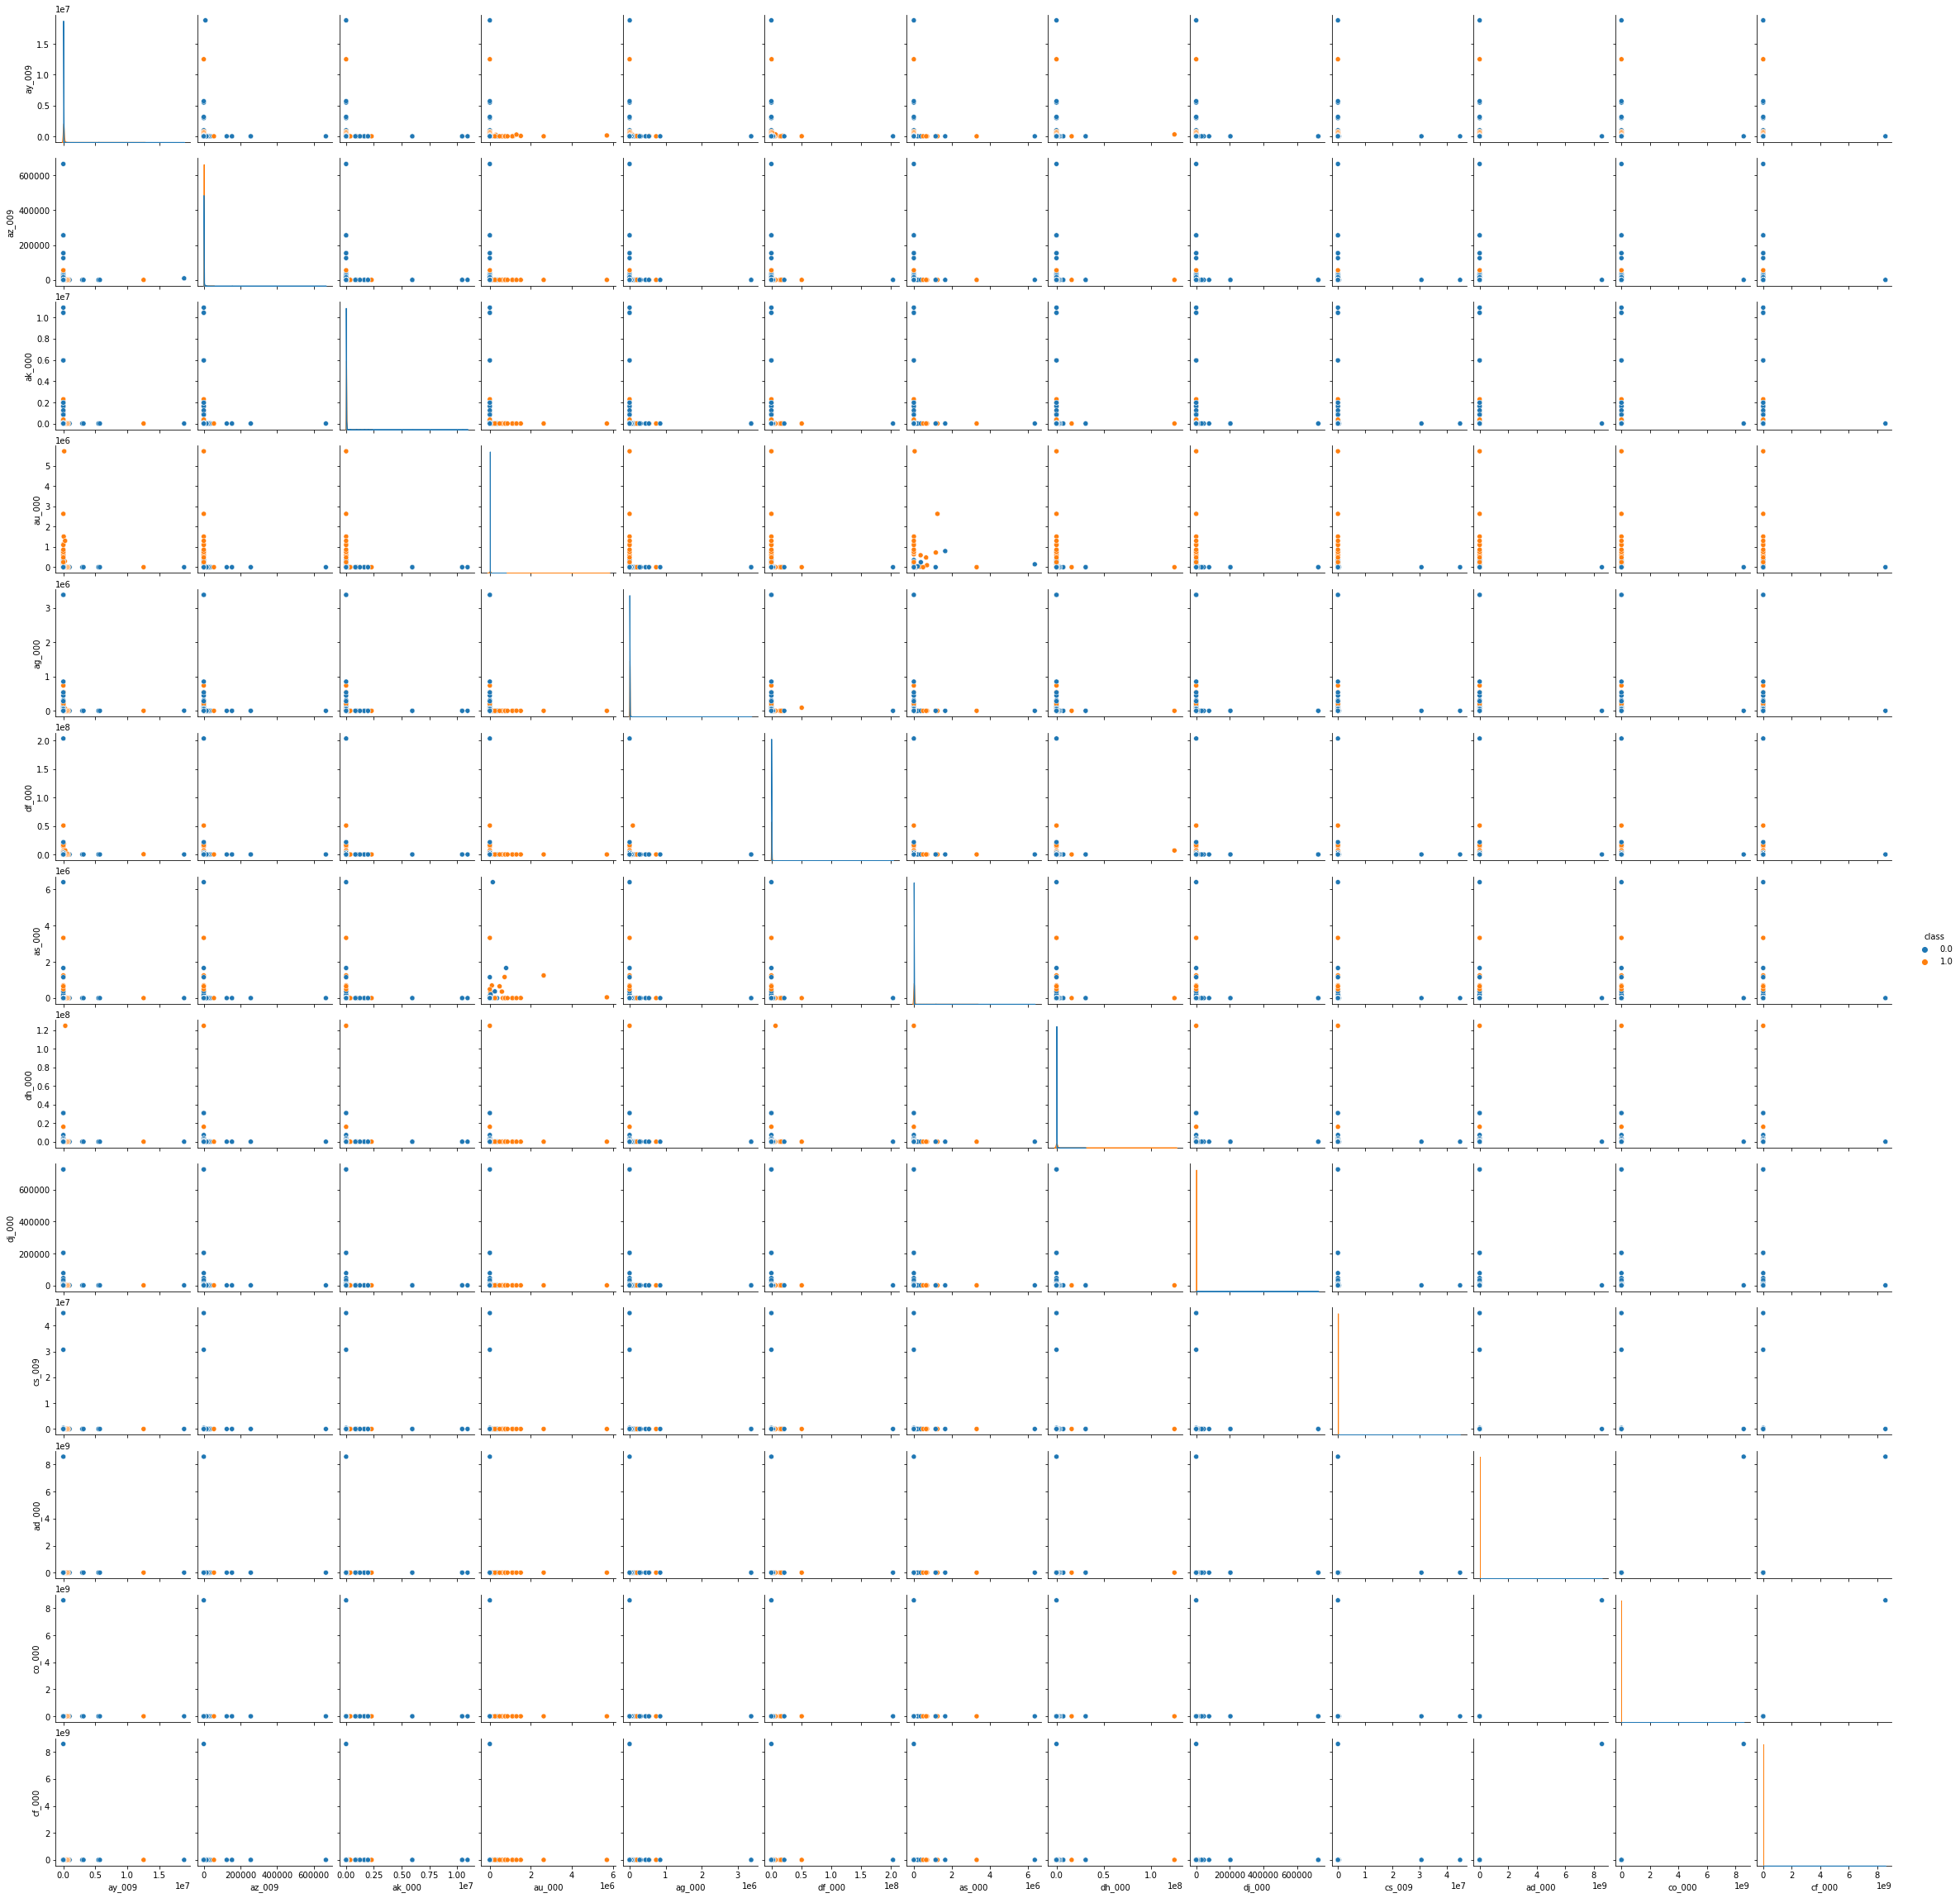

In [ ]:
ncv = list(top13CV.index)
top13CV_df = X[ncv]
ls = []
for i in data['class']:
    if i == 'neg':
        ls.append(float(0))
    else:
        ls.append(float(1))
top13CV_new = top13CV_df
top13CV_new['class'] = ls
sns.pairplot(top13CV_new, hue='class')

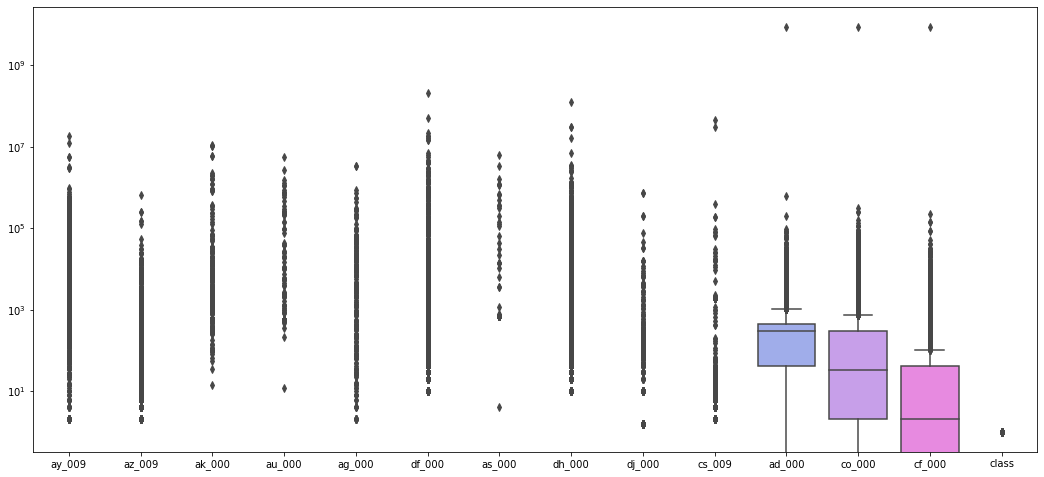

In [ ]:
fig = plt.figure(figsize=(18,18))
ax = fig.add_subplot(211)
sns.boxplot(data=top13CV_df)
plt.yscale('log')
plt.show()

## Conclusions about significance of those features, just by the scatter plots:
Some of the 13 features which are selected with the highest CV are linearly separable.

In [ ]:
data["class"].value_counts()

neg    74625
pos     1375
Name: class, dtype: int64

### There are 74625 datapoints in the negative class and 1375 datapoints in the positive class, which is only a fraction of the total dataset. Hence, this dataset is imbalanced.

## Random forest to classify the data set

In [ ]:
rf = RandomForestClassifier()
Train_Y = Train_Y.astype('category')
Train_Y["class"] = Train_Y["class"].cat.codes
Test_Y = Test_Y.astype('category')
Test_Y["class"] = Test_Y["class"].cat.codes
model_rf = RandomForestClassifier(max_depth=3, random_state=10, oob_score=True)
model_rf.fit(Train_X, Train_Y)
pred_Y = model_rf.predict(Train_X)
prob = model_rf.predict_proba(Train_X)

## Confusion matrix, ROC, AUC, and misclassification for training and test sets

In [ ]:
conf = confusion_matrix(Train_Y, pred_Y)
accuracyScore = accuracy_score(Train_Y, pred_Y)

In [ ]:
print('The confusion matrix is as printed below')
print(conf)
print(f'\nThe accuracy score is: {round(accuracyScore,4)}')
print(f'The train misclassification rate for TRAIN data is: {round(1 - accuracyScore,4)}')

The confusion matrix is as printed below
[[58972    28]
 [  694   306]]

The accuracy score is: 0.988
The train misclassification rate for TRAIN data is: 0.012


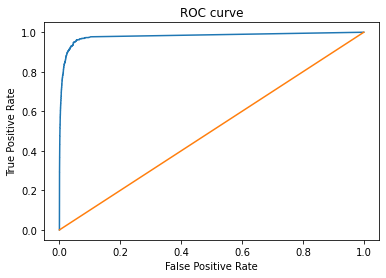


Area under curve (AUC) is: 0.9799


In [ ]:
FPR, TPR, thresholds = metrics.roc_curve(Train_Y, prob[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)
plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()
print(f'\nArea under curve (AUC) is: {round(AUC,4)}')

In [ ]:
pred_Y_test = model_rf.predict(Test_X)
prob2 = model_rf.predict_proba(Test_X)
confusionMatrix = confusion_matrix(Test_Y, pred_Y_test)
print('The confusion matrix is:')
print(confusionMatrix)
accuracyScore = accuracy_score(Test_Y, pred_Y_test)
print(f'\nThe accuracy score is: {round(accuracyScore,4)}')
print(f'The test misclassification rate is: {round(1 - accuracyScore,4)}')

The confusion matrix is:
[[15622     3]
 [  263   112]]

The accuracy score is: 0.9834
The test misclassification rate is: 0.0166


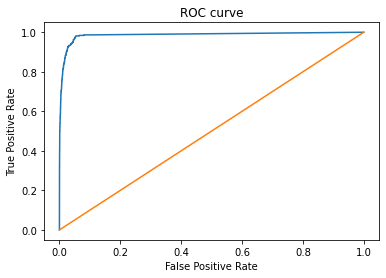


Area under curve (AUC) is: 0.9859


In [ ]:
FPR, TPR, thresholds = metrics.roc_curve(Test_Y, prob2[:,1], pos_label=1)
AUC = metrics.auc(FPR, TPR)

plt.plot(FPR, TPR)
plt.plot([0,1],[0,1])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')

plt.show()

print(f'\nArea under curve (AUC) is: {round(AUC,4)}')

## Out of Bag error estimate for random forset

In [ ]:
print('OOB Error for training data: {round(1-model_rf.oob_score_,4)}')
print('Error for Test data: {round(1-accuracyScore,4)}')

OOB Error for training data: {round(1-model_rf.oob_score_,4)}
Error for Test data: {round(1-accuracyScore,4)}


## How class imbalance is addressed in random forests. Compensation for class imbalance in random forest

In [ ]:
rf_b = RandomForestClassifier(max_depth=3, random_state=10, oob_score=True, class_weight='balanced')
rf_b.fit(Train_X, Train_Y)
X_train = Train_X
Y_train = Train_Y
X_test = Test_X
y_test = Test_Y
pred_Y = rf_b.predict(Train_X)
prob = rf_b.predict_proba(Train_X)
conf = confusion_matrix(Train_Y, pred_Y)
print('The confusion matrix is:')
print(conf)
accuracyScore = accuracy_score(Train_Y, pred_Y)
print(f'\nThe accuracy score is: {round(accuracyScore,4)}')
print(f'The train misclassification rate is: {round(1 - accuracyScore,4)}')

The confusion matrix is:
[[55684  3316]
 [   39   961]]

The accuracy score is: 0.9441
The train misclassification rate is: 0.0559


### After removing the imbalance from the data, the accuracy score has reduced

## XGBoost and Model Trees


In [ ]:
xgbe = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)
parameters = {'alpha': [0, 0.001, 0.003, 0.005, 0.007, 0.01]}
grids = GridSearchCV(estimator=xgbe,param_grid=parameters,scoring = 'roc_auc',n_jobs = 5,cv = 5,verbose=True)
grids.fit(X_train, Y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None, ...),
             n_jobs=5,
             param_grid={'alpha': [0, 0.001, 0.003, 0.005, 0.007, 0.01]},
             scoring='roc_auc', verbose=True)

In [ ]:
xgb = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42,alpha=0.001)
xgb.fit(X_train, Y_train)
y_train_xgb_pred = xgb.predict(X_train)
predictions = [round(value) for value in y_train_xgb_pred]
accuracy = metrics.accuracy_score(y_train, predictions)
print("Train error: ",round((1-accuracy),6))
y_test_xgb_pred = xgb.predict(X_test)
predictions1 = [round(value) for value in y_test_xgb_pred]
accuracy = metrics.accuracy_score(y_test, predictions1)
print("Train error: ",round((1-accuracy),5))

Train error:  1.4e-05
Train error:  0.0055


In [ ]:
cmb2 = metrics.confusion_matrix(y_test, predictions1)
cmb1 = metrics.confusion_matrix(y_train, predictions)
cm_d3 = metrics.ConfusionMatrixDisplay(confusion_matrix = cmb1, display_labels = [False, True])
cm_d4 = metrics.ConfusionMatrixDisplay(confusion_matrix = cmb1_bal2, display_labels = [False, True])

Confusion Matrix for Training set with XGB


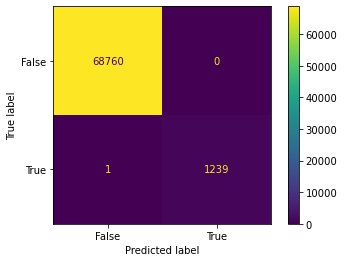

In [ ]:
print('Confusion Matrix for Training set with XGB')
cm_d3.plot()
plt.show()

Confusion Matrix for Test set with XGB


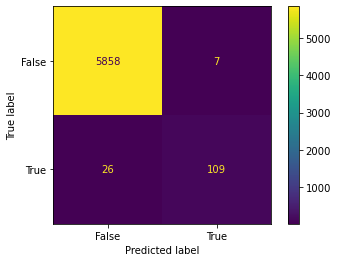

In [ ]:
print('Confusion Matrix for Test set with XGB')
cm_d4.plot()
plt.show()

ROC, AUC for Training set with XGB


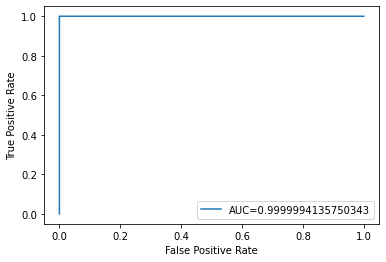

In [ ]:
y_pred_train_prob = xgb.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train_prob)
auc = metrics.roc_auc_score(y_train, y_pred_train_prob)
print('ROC, AUC for Training set with XGB')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ROC, AUC for Testing set with XGB


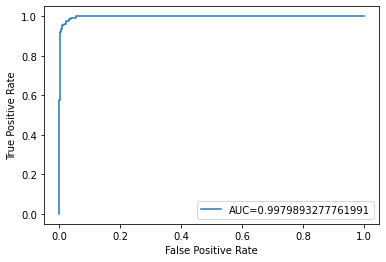

In [ ]:
y_pred_proba_bal = xgb.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_bal)
auc = metrics.roc_auc_score(y_test, y_pred_proba_bal)
print('ROC, AUC for Testing set with XGB')
#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## XGBoost using SMOTE

In [ ]:
pipeelin = imbpipeline(steps = [['smote', SMOTE(random_state=11)],
                                ['classifier', XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42)]])
stratified_kfold = StratifiedKFold(n_splits=5,
                                       shuffle=True,
                                       random_state=11)
param_grid = {'classifier__alpha': [0, 0.001, 0.003, 0.005, 0.007, 0.01]}
grid_s1 = GridSearchCV(estimator=pipeline,
                           param_grid=param_grid,
                           scoring='roc_auc',
                           cv=stratified_kfold,
                           n_jobs=5)
grid_s1.fit(X_train, y_train)



GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[['smote', SMOTE(random_state=11)],
                                       ['classifier',
                                        XGBClassifier(base_score=None,
                                                      booster=None,
                                                      callbacks=None,
                                                      colsample_bylevel=None,
                                                      colsample_bynode=None,
                                                      colsample_bytree=None,
                                                      early_stopping_rounds=None,
                                                      enable_categorical=False,
                                                      eval_metric=None,
                                                      feature_ty...
                                                      learning_rate=None,
                                                      max_bin=None,
                                                      max_cat_threshold=None,
                                                      max_cat_to_onehot=None,
                                                      max_delta_step=None,
                                                      max_depth=None,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None, nthread=4,
                                                      num_parallel_tree=None,
                                                      predictor=None, ...)]]),
             n_jobs=5,
             param_grid={'classifier__alpha': [0, 0.001, 0.003, 0.005, 0.007,
                                               0.01]},
             scoring='roc_auc')

In [ ]:
smote=SMOTE()
sm_trainX, sm_trainY = smote.fit_resample(X_train, y_train)
xgb1 = XGBClassifier(objective= 'binary:logistic',nthread=4,seed=42,alpha=0)
xgb1.fit(sm_trainX, sm_trainY)
y_train_xgb1_pred = xgb1.predict(X_train)
predictions2 = [round(value) for value in y_train_xgb1_pred]
accuracytr = metrics.accuracy_score(y_train, predictions2)
y_test_xgb1_pred = xgb1.predict(X_test)
predictions3 = [round(value) for value in y_test_xgb1_pred]
accuracyte = metrics.accuracy_score(y_test, predictions3)
print("Train error with SMOTE and best alpha val: ",round((1-accuracytr),6))
print("Test error with SMOTE and best alpha val: ",round((1-accuracyte),5))

Train error with SMOTE and best alpha val:  2.9e-05
Test error with SMOTE and best alpha val:  0.00733


Confusion Matrix for Training set with XGB using SMOTE and best alpha


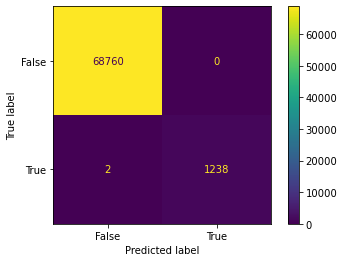

In [ ]:
cmb = metrics.confusion_matrix(y_train, predictions2)
cm_display3 = metrics.ConfusionMatrixDisplay(confusion_matrix = cmb, display_labels = [False, True])
print('Confusion Matrix for Training set with XGB using SMOTE and best alpha')
cm_display3.plot()
plt.show()

Confusion Matrix for Test set with XGB using SMOTE and best alpha


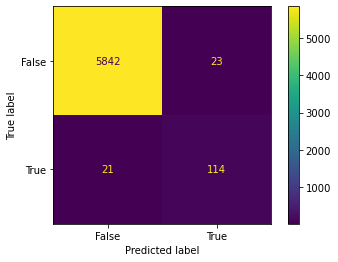

In [ ]:
confusion_matrix1_bal2 = metrics.confusion_matrix(y_test, predictions3)
cm_display4 = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix1_bal2, display_labels = [False, True])
print('Confusion Matrix for Test set with XGB using SMOTE and best alpha')
cm_display4.plot()
plt.show()

ROC, AUC for Training set with XGB using SMOTE and best alpha


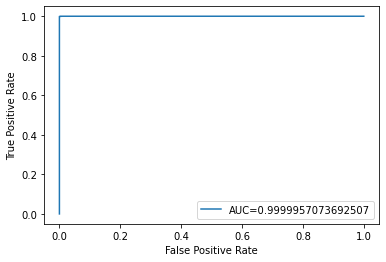

In [ ]:
y_pred_train_prob = xgb1.predict_proba(X_train)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_train,  y_pred_train_prob)
auc = metrics.roc_auc_score(y_train, y_pred_train_prob)
print('ROC, AUC for Training set with XGB using SMOTE and best alpha')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

ROC, AUC for Testing set with XGB using SMOTE and best alpha


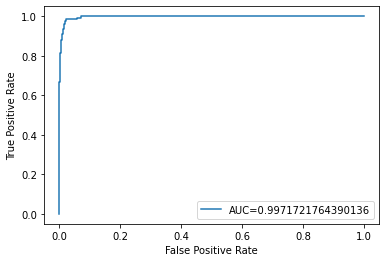

In [ ]:
y_pred_proba_bal = xgb1.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba_bal)
auc = metrics.roc_auc_score(y_test, y_pred_proba_bal)
print('ROC, AUC for Testing set with XGB using SMOTE and best alpha')
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()